In [4]:
#true combine both 
#time is fixed at t=1, l,k and m are changing 
import matplotlib.pyplot as plt
import numpy as np
import cmath
import scipy.integrate as scint
import math

def g2(l,k,t):
    d=cmath.sqrt(l**2-2*k*l)
    g2=(4*k*(l/d)*cmath.sinh(0.5*d*t))/(cmath.cosh(0.5*d*t)+(l/d)*cmath.sinh(0.5*d*t))
    return g2.real

def g3(m,c,t):
    meu=cmath.sqrt((2*c/m)**2-1)
    g3=((m/meu)*(meu**2+1)*cmath.sin(meu*m*t))/(cmath.cos(meu*m*t)+cmath.sin(meu*m*t)/meu)
    return g3.real    

def tevolve(l,k,m,c,t,rho): #complex stuff here 
    d=cmath.sqrt(l**2-2*k*l)
    meu=cmath.sqrt((2*c/m)**2-1)
    if meu==0+0j:
        print(c,m)
    rhot=np.zeros((2,2))
    xt=np.exp(-l*t)*(cmath.cosh(0.5*d*t)+(l/d)*cmath.sinh(0.5*d*t))**2
    p1t=xt*rho[1,1]+1-xt
    rtnd=np.exp(-m*t)*(cmath.cos(meu*m*t)+cmath.sin(meu*m*t)/meu)
    coh=rho[0,1]*cmath.sqrt(xt)*rtnd
    rhot[0,0]=1-p1t.real
    rhot[1,1]=p1t.real
    rhot[0,1]=coh.real
    rhot[1,0]=coh.real
    return rhot

def lind(l,k,m,c,t,rhot):
    sz=np.array([[1,0],[0,-1]])
    sp=np.array([[0,1],[0,0]])
    sm=np.array([[0,0],[1,0]])
    ld=np.zeros((2,2))
    ld=0.5*g2(l,k,t)*(sm@rhot@sp-0.5*(sp@sm@rhot+rhot@sp@sm))+0.5*g3(m,c,t)*(sz@rhot@sz-rhot)
    return ld

def maxvalgen(l,k,m,c,t,rho): #generates the required max value
    rhot=tevolve(l,k,m,c,t,rho)
    norm=lind(l,k,m,c,t,rhot).T@lind(l,k,m,c,t,rhot)
    val=np.linalg.eig(norm)[0]
    fx=np.sqrt(max((val))) #converts into float from complex
    return fx

def bures(l,k,m,c,time,rho): #the Bures angle 
    z1=0
    garb=np.zeros((2,2))
    garb=tevolve(l,k,m,c,time,rho)@rho
    mixpart=np.linalg.det(rho)*np.linalg.det(tevolve(l,k,m,c,time,rho))
    z1=math.acos(abs(np.sqrt(garb.trace())+2*np.sqrt(mixpart)))
    b=np.sin(z1)**2
    return b

time=1 #will give upper limits actual driving time
k=np.arange(0.1,40,0.1)
l=0.1*k
#l=7*k
m=[0.1,90] #non-markov, markov 
c=k #og
#c=[10,0.001] #non-markov, markov 
#m=l
cases=2 #values of m

rho=np.array([[0.5,0.5],[0.5,0.5]])  #time=np.arange(0,300,dt) 
n=200;#no. of points in the smaller integrations

a=0 #lower limit
b=time #upper limit
fint=np.zeros((cases,len(k)))
bur=np.zeros((cases,len(k)))
qsl=np.zeros((cases,len(k)))
revqsl=np.zeros((cases,len(k)))
for j in range(cases):
    for i in range(len(k)):
        f=lambda x:maxvalgen(l[i],k[i],m[j],c[i],x,rho)
        fint[j,i]=scint.quad(f,a,b,limit=150)[0]
        bur[j,i]=bures(l[i],k[i],m[j],c[i],time,rho)
    qsl[j,:]=np.divide(bur[j,:],fint[j,:])
    revqsl[j,:]=np.divide(fint[j,:],bur[j,:])

rhot=np.zeros((2,2))
rho=np.array([[0.5,0.5],[0.5,0.5]])
garb=np.zeros((2,2))
Cpar=np.zeros((cases,len(k)))
mix=np.zeros((cases,len(k)))
bound=np.zeros((cases,len(k)))
for j in range(cases):
    for i in range(len(k)):
        rhot=tevolve(l[i],k[i],m[j],c[i],time,rho)
        Cpar[j,i]=abs(rhot[0,1])+abs(rhot[1,0])
        garb=rhot@rhot
        mix[j,i]=2*(1-garb.trace())
        bound[j,i]=Cpar[j,i]**2+mix[j,i]
        i=i+1
    i=0


/home/u136094/tmp/ipykernel_1553528/2385923223.py:35: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.savefig('cad_rtn.png',dpi=120,bbox_inches='tight',pad_inches = 0.1)


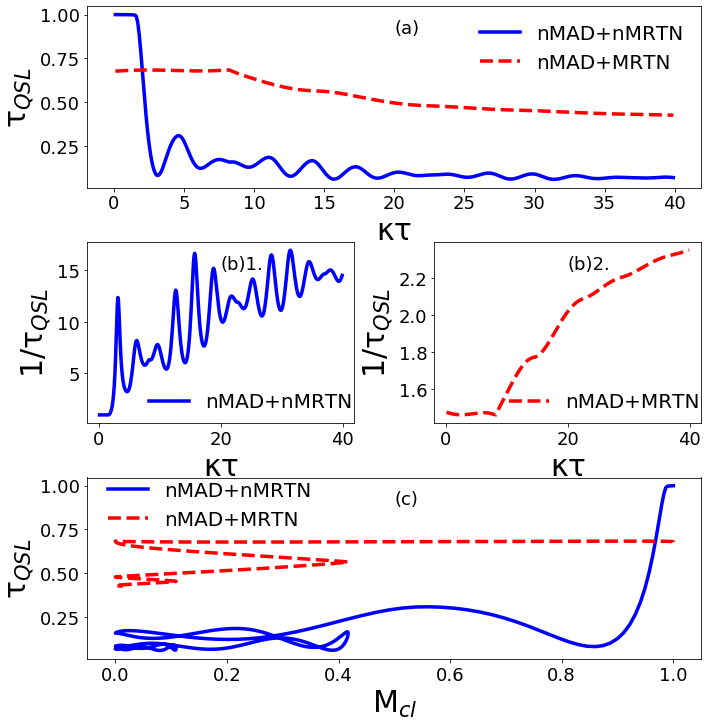

In [5]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
fig = plt.figure(tight_layout=True,figsize=(11,12))
plt.rcParams.update({'font.size': 18})
gs = gridspec.GridSpec(3, 2, wspace=0.3, hspace=0.3)
ax1 = fig.add_subplot(gs[0, :])
ax1.plot(k,qsl[0,:],'b',linewidth=3.5, label='nMAD+nMRTN')
ax1.plot(k,qsl[1,:],'r--', linewidth=3.5, label='nMAD+MRTN')
ax1.legend(frameon=False, fontsize=20)
ax1.set_xlabel('\u03BA\u03C4',fontsize=30)
ax1.set_ylabel('\u03C4$_{QSL}$',fontsize=30)
ax1.text(0.5, 0.85, '(a)',transform=ax1.transAxes)

ax2 = fig.add_subplot(gs[1, 0])
ax2.plot(k,revqsl[0,:],'b',linewidth=3.5, label='nMAD+nMRTN')
ax2.set_xlabel('\u03BA\u03C4',fontsize=30)
ax2.set_ylabel('1/\u03C4$_{QSL}$',fontsize=30)
ax2.text(0.5, 0.85, '(b)1.',transform=ax2.transAxes)
ax2.legend(loc=(0.2,0.02),frameon=False,fontsize=20) 

ax2 = fig.add_subplot(gs[1, 1])
ax2.plot(k,revqsl[1,:],'r--',linewidth=3.5, label='nMAD+MRTN')
ax2.set_xlabel('\u03BA\u03C4',fontsize=30)
ax2.set_ylabel('1/\u03C4$_{QSL}$',fontsize=30)
ax2.text(0.5, 0.85, '(b)2.',transform=ax2.transAxes)
ax2.legend(loc=(0.25,0.02),frameon=False,fontsize=20) 

ax3 = fig.add_subplot(gs[2, :])
ax3.plot(bound[0,:],qsl[0,:],'b',linewidth=3.5,label='nMAD+nMRTN')
ax3.plot(bound[1,:],qsl[1,:],'r--',linewidth=3.5,label='nMAD+MRTN')
ax3.set_xlabel('M$_{cl}$',fontsize=30)
ax3.set_ylabel('\u03C4$_{QSL}$',fontsize=30)
ax3.text(0.5, 0.85, '(c)',transform=ax3.transAxes)
ax3.legend(loc=(0.02,0.67),frameon=False,fontsize=20)
fig.savefig('cad_rtn.png',dpi=120,bbox_inches='tight',pad_inches = 0.1)